In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.extensions import Initialize
from math import sqrt, pi

In [2]:
# Contains what was shown in Skype, a 'static' animation of
# animate_ry : the Ry-gate
# animate    : either 1-parameter gate, to be specified in the input
# animate_u2 : the U2-gate
# animate_u3 : the U3-gate

In [3]:
def animate_ry(phi, steps=3):
    circuit = QuantumCircuit(steps+1, steps+1)
    temp_phi = 0
    for counter in range(steps+1):
        circuit.ry(temp_phi, counter)
        temp_phi += phi/steps
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    return plot_bloch_multivector(statevector)

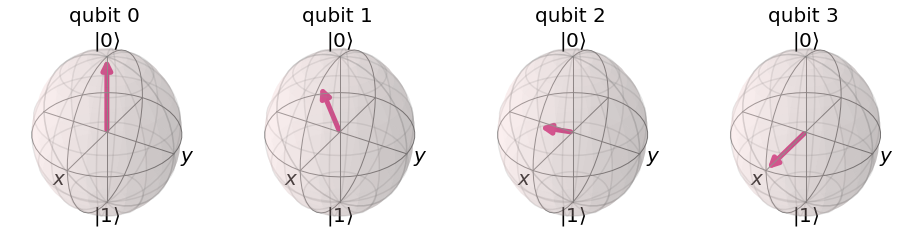

In [4]:
animate_ry(0.5*pi)

In [5]:
# some states to start with
zero = [1, 0]
one = [0, 1]
plus = [1/sqrt(2), 1/sqrt(2)]
minus = [1/sqrt(2), -1/sqrt(2)]

# and some alternatives
yyy = [1/sqrt(2), complex(0,1/sqrt(2))]
pyth = [0.8, 0.6]
zero2 = [-1, 0]
zero3 = [complex(0, 1), 0]        # 
zero4 = [complex(0, -1), 0]       #
zero5 = [complex(0.8, 0.6), 0]    #

plus2 = [-1/sqrt(2), -1/sqrt(2)]
plus3 = [complex(0,1/sqrt(2)), complex(0,-1/sqrt(2))]

In [6]:
# and some gates
rx = qiskit.circuit.quantumcircuit.QuantumCircuit.rx
ry = qiskit.circuit.quantumcircuit.QuantumCircuit.ry
rz = qiskit.circuit.quantumcircuit.QuantumCircuit.rz
u1 = qiskit.circuit.quantumcircuit.QuantumCircuit.u1

u2 = qiskit.circuit.quantumcircuit.QuantumCircuit.u2

u3 = qiskit.circuit.quantumcircuit.QuantumCircuit.u3

In [7]:
def animate(phi, init=[1,0], gate=QuantumCircuit.ry, steps=3):
    circuit = QuantumCircuit(steps+1, steps+1)
    for i in range(steps+1):
        circuit.append(Initialize(init), [i])
    temp_phi = 0
    for counter in range(steps+1):
        gate(circuit, temp_phi, counter)
        temp_phi += phi/steps
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    #print(statevector)
    return plot_bloch_multivector(statevector)
    #return statevector

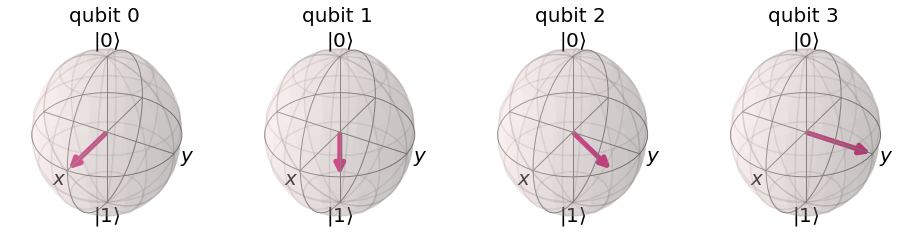

In [8]:
animate(0.5*pi, plus, rz)

In [9]:
def animate_u2(params, init=[1,0], gate=QuantumCircuit.ry, steps=3):
    circuit = QuantumCircuit(steps+1, steps+1)
    for i in range(steps+1):
        circuit.append(Initialize(init), [i])
    phi, rho = params
    temp_phi = 0
    temp_rho = 0
    for counter in range(steps+1):
        #gate(circuit, temp_phi, counter)
        circuit.u2(temp_phi, temp_rho, counter)
        temp_phi += phi/steps
        temp_rho += rho/steps
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    #print(statevector)
    return plot_bloch_multivector(statevector)
    #return circuit

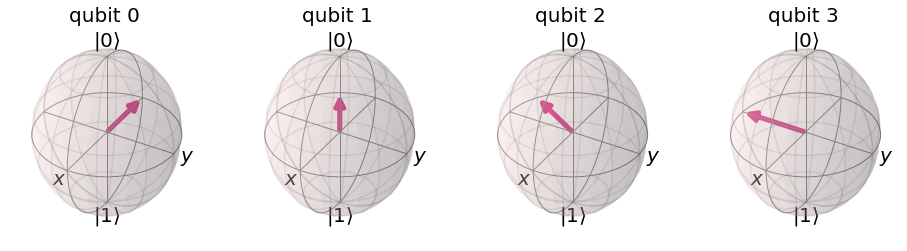

In [10]:
animate_u2([0.5*pi, 0.5*pi], init=one)

In [11]:
def animate_u3(params, init=[1,0], steps=3):
    circuit = QuantumCircuit(steps+1, steps+1)
    for i in range(steps+1):
        circuit.append(Initialize(init), [i])
    phi, rho, lam = params
    temp_phi = 0
    temp_rho = 0
    temp_lam = 0
    for counter in range(steps+1):
        #gate(circuit, temp_phi, counter)
        circuit.u3(temp_phi, temp_rho, temp_lam, counter)
        temp_phi += phi/steps
        temp_rho += rho/steps
        temp_lam += lam/steps
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    #print(statevector)
    return plot_bloch_multivector(statevector)
    #return circuit

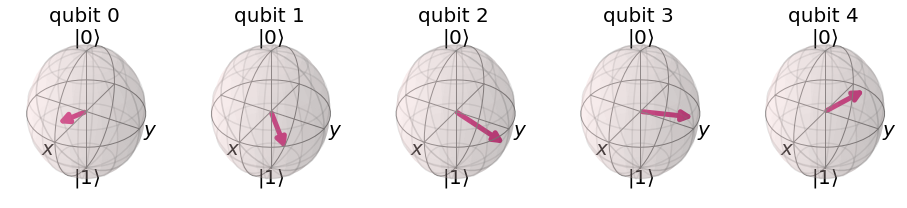

In [12]:
animate_u3([0.5*pi, 0.5*pi, 0.5*pi], pyth, steps=4)